# What are convolutions?

[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/convnets/blob/master/learn/00_what_are_convolutions.ipynb)

A convolution is a mathematical operation that combines two functions to produce a third function that represents how one of the original functions is modified by the other. In the context of image processing and computer vision, a convolution is the process of applying a small matrix of numbers, called a kernel or filter, to each part of an image, in order to detect specific patterns or features in the image. The kernel is moved over the image, and at each position, the values of the kernel are multiplied with the corresponding values in the image and then summed up. This process is called convolution operation. The output of the convolution is a new image, called the convolved image, which contains information about the features present in the original image.

*Source: ChatGPT*

![convolution](https://miro.medium.com/max/1052/1*GcI7G-JLAQiEoCON7xFbhg.gif)

Let's see an example of waht this means.

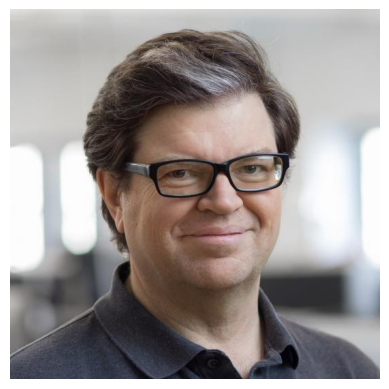

In [9]:
# read image

import matplotlib.pyplot as plt

img = plt.imread('pics/yann-lecun.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()


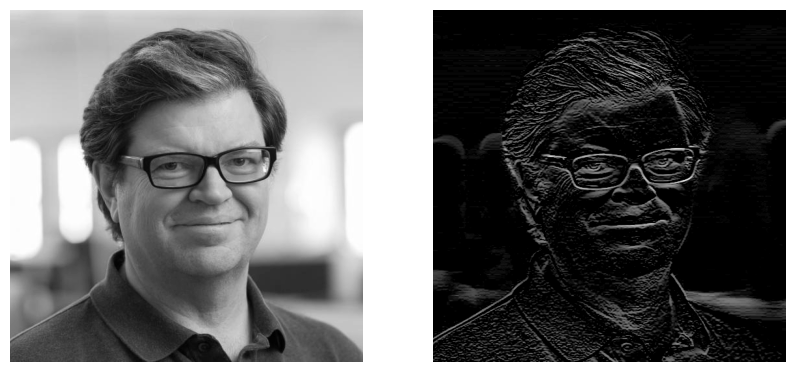

In [12]:
import numpy as np
import scipy.signal
from skimage import color
from skimage import exposure

# convert image to grayscale
img_g = color.rgb2gray(img)      

# highlight horizontal edges
kernel = np.array([[1,1,1],
                   [0,0,0],
                   [-1,-1,-1]])

# apply convolution
def apply_convolution(img, kernel):
    edges = scipy.signal.convolve2d(img, kernel, 'valid')
    edges = exposure.equalize_adapthist(edges/np.max(np.abs(edges)), clip_limit=0.03)
    return edges

# plot results
def plot_results(img, kernel):
    edges = apply_convolution(img, kernel)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    ax1.imshow(img_g, cmap=plt.cm.gray)   
    ax1.axis('off')
    ax2.imshow(edges, cmap=plt.cm.gray)   
    ax2.axis('off')
    plt.show()

plot_results(img_g, kernel)

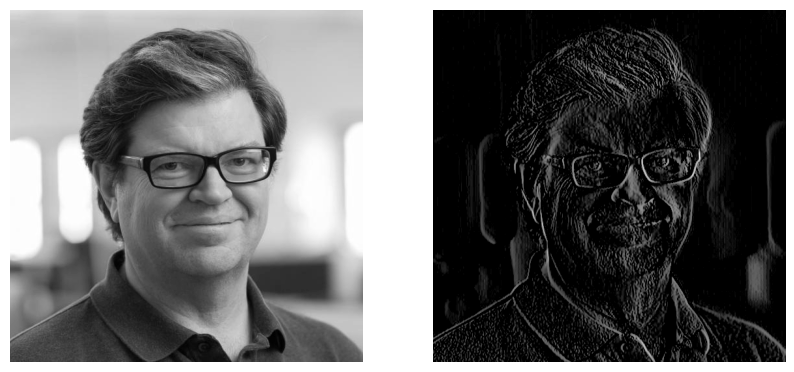

In [13]:
# highlight vertical edges
kernel = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

plot_results(img_g, kernel)

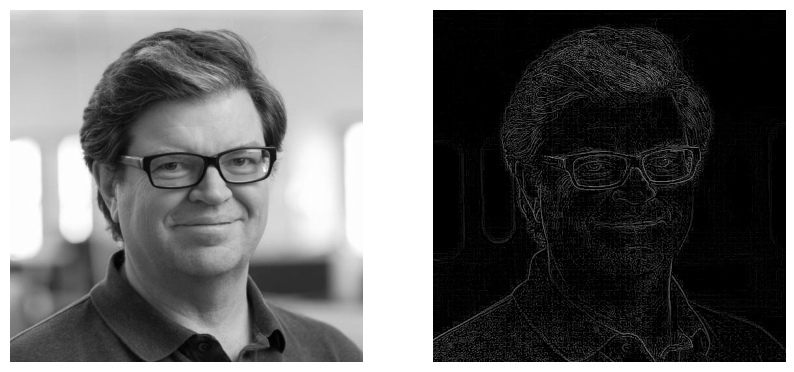

In [14]:
# highlight all edges
kernel = np.array([[0,-1,0],
                   [-1,4,-1],
                   [0,-1,0]])

plot_results(img_g, kernel)

This information can then be used to implement a variety of image processing and computer vision algorithms, such as image classification. Defining the kernels by hand, however, is a tedious and error-prone process. Convolutional Neural Networks are a kind of neural network that use convolutions to learn the kernels that are applied to the input image. This allows the network to learn the kernels automatically, and to learn to detect features in the input image that are useful for the task at hand.

The use of convolutional layers introduce what is called *inductive bias*, or *priors*, in the network. These priors are assumptions about the data that the network makes, and that help it to learn more efficiently. In the case of convolutional neural networks, the inductive bias is that the input data is composed of images, and that the images are composed of local patterns. This assumption allows the network to learn to detect local patterns in the input image, and to combine these local patterns into more complex patterns, in a more efficient way.

Additionally, their implementation and execution in accelerators (such as GPUs) is highly optimized, which makes them very efficient to train.